# 3D plots from records (IAT fixed, ST changing)

In [29]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [30]:
#IAT fixed, ST changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVa.csv')
df = df.sort_values(by='mu_kurt')


#filtered_df_121 = df[(df["coeffST_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]
filtered_df_121 = df[(df["coeffST_sq"] == 1.21)]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

#filtered_df_4 = df[(df["coeffST_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]
filtered_df_4 = df[(df["coeffST_sq"] == 4) ]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

#filtered_df_25 = df[(df["coeffST_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]
filtered_df_25 = df[(df["coeffST_sq"] == 25)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

#filtered_df_64 = df[(df["coeffST_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]
filtered_df_64 = df[(df["coeffST_sq"] == 64)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq    lam_kurt   mu_kurt  Response time
2803           16        1.21   74.574020  9.353002       9.959330
2840           16        1.21  125.901561  9.353038       5.467203
891            16        1.21   48.248066  9.353067      14.224769
1961           16        1.21  283.696402  9.353768       2.860649
823            16        1.21   48.421679  9.354146      14.190804
      coeffIAT_sq  coeffST_sq     lam_kurt    mu_kurt  Response time
4905           16         4.0   721.137664  12.751400       3.657889
3320           16         4.0    59.279428  12.758081      13.484666
3285           16         4.0   375.414934  12.761071       4.353532
5496           16         4.0    49.193345  12.768532      14.999572
4662           16         4.0  2666.445392  12.778777       3.080207
      coeffIAT_sq  coeffST_sq      lam_kurt    mu_kurt  Response time
7108           16        25.0    508.788044  75.124917      14.130651
6718           16        25.0  12687.619026 

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


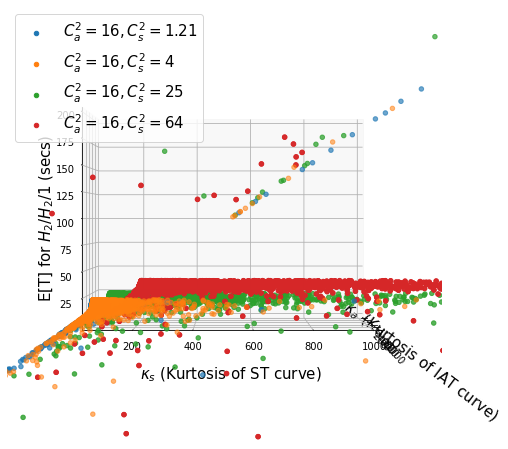

In [35]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = r'$C_a^2 = 16, C_s^2 = 1.21$')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = r'$C_a^2 = 16, C_s^2 = 4$')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = r'$C_a^2 = 16, C_s^2 = 25$')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = r'$C_a^2 = 16, C_s^2 = 64$')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,200)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel(r'$\kappa_a$ (Kurtosis of IAT curve)', labelpad = 20, fontsize = 15)
ax1.set_ylabel(r'$\kappa_s$ (Kurtosis of ST curve)', labelpad = 20, fontsize = 15)
ax1.set_zlabel('E[T] for $H_2/H_2/1$ (secs)', fontsize = 15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

ax1.xaxis.set_major_formatter(ScalarFormatter())

'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')

'''
plt.legend(prop = { "size": 15 })
plt.savefig("DetailsH2_H2_1_fixedmean_CVa3D_load0.4.pdf", dpi = 200, bbox_inches = "tight")
plt.show()


# 3D plots from records (ST fixed, IAT changing)

In [24]:
#ST fixed, IAT changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVs2D_load0.4.csv')
df = df.sort_values(by='lam_kurt')


filtered_df_121 = df[(df["coeffIAT_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

filtered_df_4 = df[(df["coeffIAT_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

filtered_df_25 = df[(df["coeffIAT_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

filtered_df_64 = df[(df["coeffIAT_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq  lam_kurt     mu_kurt  Response time
1788         1.21          16  6.112941  307.127520      22.841273
933          1.21          16  6.113507  550.481285      22.841207
965          1.21          16  6.115517  330.607100      22.840990
2857         1.21          16  6.117667  293.588591      22.840766
2194         1.21          16  6.126448  229.528832      22.840042
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
3127          4.0          16  12.763080  481.852110      25.164205
4024          4.0          16  12.779336  272.126312      25.161533
4189          4.0          16  12.783990  208.902864      25.160923
3818          4.0          16  12.786245  745.133945      25.160363
3026          4.0          16  12.786322  252.328830      25.160406
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
6867         25.0          16  75.125870  249.692994      42.665355
8615         25.0          16  75.127320  795.658917  

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


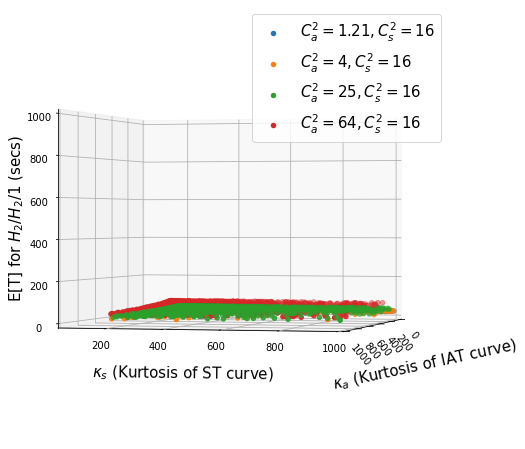

In [25]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = r'$C_a^2 = 1.21, C_s^2 = 16$')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = r'$C_a^2 = 4, C_s^2 = 16$')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = r'$C_a^2 = 25, C_s^2 = 16$')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = r'$C_a^2 = 64, C_s^2 = 16$')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,1000)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel(r'$\kappa_a$ (Kurtosis of IAT curve)', labelpad = 20, fontsize = 15)
ax1.set_ylabel(r'$\kappa_s$ (Kurtosis of ST curve)', labelpad = 20, fontsize = 15)
ax1.set_zlabel('E[T] for $H_2/H_2/1$ (secs)', fontsize = 15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

ax1.xaxis.set_major_formatter(ScalarFormatter())
'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')
'''

plt.legend(prop = { "size": 15 })
plt.savefig("DetailsH2_H2_1_fixedmean_CVs3D_load0.4.pdf", dpi = 200, bbox_inches = "tight")
plt.show()